# 4 Other Packages

---

> Author: <font color='#f78c40'>Samuel Farrens</font>    
> Year: 2017  
> Email: [samuel.farrens@gmail.com](mailto:samuel.farrens@gmail.com)  
> Website: <a href="https://sfarrens.github.io" target="_blank">https://sfarrens.github.io</a>

---

Now that you have mastered the basics of Python and the essential packages you can begin to explore some of the other packages that are available. Here I will briefly introduce a few that I use often.

---

## Contents

1. [Installation](#Installation)
1. [Scipy](#Scipy)
 * [Fourier Transforms](#Fourier-Transforms)
 * [SVD](#SVD)
1. [Astropy](#Astropy)
 * [FITS Files](#FITS-Files)
 * [Convolution](#Convolution)
1. [Exercises](#Exercises)
 * [Exercise 4.1](#Exercise-4.1)
 * [Exercise 4.2](#Exercise-4.2)
 
---

## Installation

To install the packages discussed in this notebook simply run the following commands in a terminal

```bash

$ pip install scipy
$ pip install astropy

```
---

## Scipy

<a href="https://www.scipy.org/" target="_blank">Scipy</a> is an open source package for scientific computing that contains a collection of useful algorithms and tools. Scipy overlaps with some Numpy modules. Scipy, however, tends to be a bit more comprehensive in certain areas.

### Fourier Transforms

The **`fftpack`** module in scipy (<a href="https://docs.scipy.org/doc/scipy/reference/fftpack.html" target="_blank">scipy.fftpack</a>) contains virtually all the tools you will need for working in Fourier space. 

You can import the package as follows

In [1]:
from scipy import fftpack

and since it is easier to understand these operations visually, we can also import matplotlib.

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.image import imread

We can start with a simple sine curve time series.

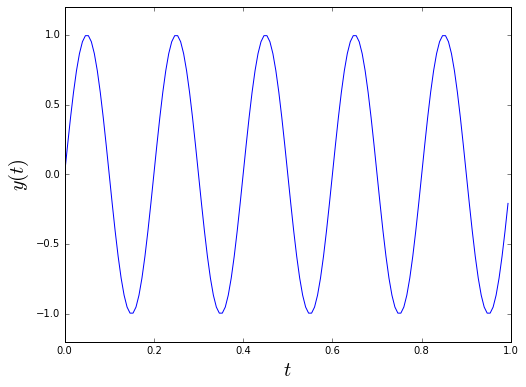

In [3]:
# set the signal properties
sample_rate = 150.0
signal_freq = 5

# generate a range of time values
t = np.arange(0, 1, 1 / sample_rate)

# calculate the sin curve
y = np.sin(2 * np.pi * signal_freq * t)

# plot the curve
plt.figure(figsize=(8, 6))
plt.plot(t, y, 'b-')
plt.ylim(-1.2, 1.2)
plt.xlabel('$t$', fontsize=20)
plt.ylabel('$y(t)$', fontsize=20)
plt.show()

Now we can use the command **`fft()`** to transform the data.

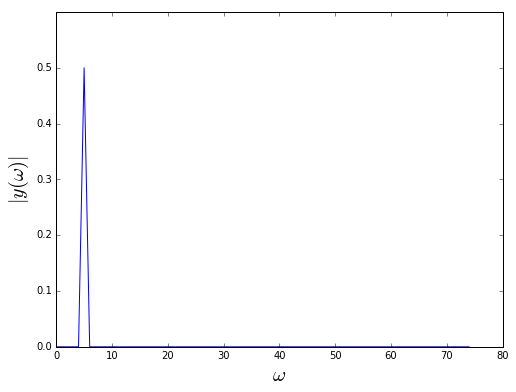

In [4]:
# define the frequency range
frq = (np.arange(y.size) * sample_rate / y.size)[:y.size / 2]

# calculate the FFT of the sine curve
abs_y = np.abs((fftpack.fft(y) / y.size)[:frq.size])

# display the FFT data
plt.figure(figsize=(8, 6))
plt.plot(frq, abs_y, 'b-')
plt.ylim(0, 0.6)
plt.xlabel('$\omega$', fontsize=20)
plt.ylabel('$|y(\omega)|$', fontsize=20)
plt.show()

### SVD

Singular Value Decomposition can be performed using the **`svd()`** command in the **`linalg`** module.

> If you have not already done so, you will need to download the [Materials](https://minhaskamal.github.io/DownGit/#/home?url=https://github.com/sfarrens/notebooks/tree/master/Python/materials) directory and unzip it.  
> You can use the following command in a terminal:  
> ``` bash
> $ unzip materials.zip
> ```  
> **<font color='red'>NOTE:</font>** you need to place the `Materials` folder in the same directory as this notebook.


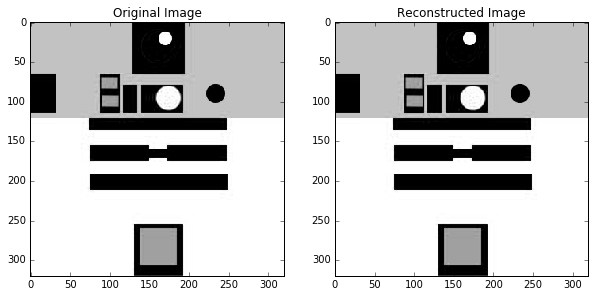

In [5]:
# import the linalg module
from scipy import linalg

# read in an image
x = imread('materials/r2d2.jpg')[:, :, 0]

# calculate the svd
u, s, v = linalg.svd(x)

# keep only singular values >= 1.0
s_new = s * (np.abs(s) >= 1.0)

# reconstruct the image with thresholded singular values
s_new = linalg.diagsvd(s_new, *x.shape)
x_new = np.dot(u, np.dot(s_new, v))

# dsiplay the two images
plt.figure(figsize=(10, 8))
plt.subplot(121)
plt.imshow(x, interpolation='none', cmap='gray')
plt.title('Original Image')
plt.subplot(122)
plt.imshow(x_new, interpolation='none', cmap='gray')
plt.title('Reconstructed Image')
plt.show()

In this example the **`diagsvd()`** command diagonalises and reshapes the array of singular values.

---

## Astropy

<a href="http://www.astropy.org/" target="_blank">Astropy</a> is a package that contains tools designed for the analysis of astronomical data.

### FITS Files

One of the most useful modules in Astropy is **`io.fits`** (<a href="http://docs.astropy.org/en/stable/io/fits/" target="_blank">astropy.io.fits</a>), which handles the reading and writing FITS binary files.

You can import the module as follows

In [6]:
from astropy.io import fits

and use it to read a fits image as follows

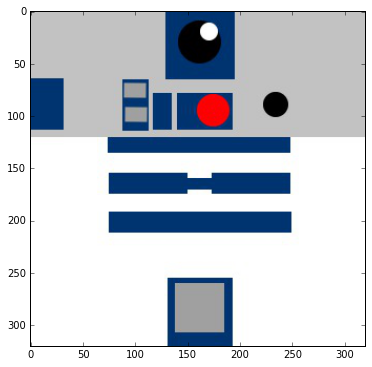

In [7]:
# read image data from FITS file
x = fits.getdata('materials/r2d2.fits')

# Display the image
plt.figure(figsize=(6, 6))
plt.imshow(x)
plt.show()

You can write image data to a new file as follows

In [8]:
# generate an array of random numbers
x = np.random.ranf((10, 10))

# save array to a FITS file
fits.PrimaryHDU(x).writeto('materials/random_data.fits')

### Convolution

You can convolve vectors or matrices using the **`convolve_fft()`** command in the **`convolution`** module (<a href="http://docs.astropy.org/en/stable/convolution/" target="_blank">astropy.convoluion</a>).

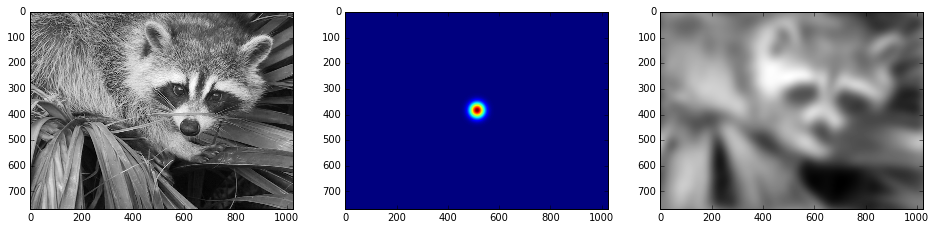

In [9]:
# read in image from scipy.misc
from scipy.misc import face

# import Gaussian filter function
from scipy.ndimage import gaussian_filter

# import astropy methods
from astropy.convolution import convolve_fft

# set the image as a 2D array
image = face()[:, :, 0]

# create a 2D Gaussian kernel with sigma=0.5
kernel = np.zeros(image.shape)
kernel[list(zip(np.array(kernel.shape) / 2))] = 1
kernel = gaussian_filter(kernel, 20)

# convolve the image by the kernel
convolved_image = convolve_fft(image, kernel, boundary='wrap')

# display the images
plt.figure(figsize=(16, 6))
plt.subplot(131)
plt.imshow(image, cmap='gray')
plt.subplot(132)
plt.imshow(kernel)
plt.subplot(133)
plt.imshow(convolved_image, cmap='gray')
plt.show()

---

## Exercises

### Exercise 4.1

Write your own convolution function and compare its performance to the astroy module. Your function should:

- Take an image and a convolution kernel as inputs
- Output a convolved image
- The convolution kernel should be a Gaussian with sufficiently large $\sigma$ to visually distort the image
- You can use the scipy **`fftpack`** module
- You can use any input image you like

Recall the *convolution theorem*

$$\mathcal{F}\{x * y\} = \mathcal{F}\{x\} \cdot \mathcal{F}\{y\}$$

where $\mathcal{F}\{x\}$ denotes the Fourier transform of $x$, and $x * y$ denotes the convolution of $x$ and $y$.

Display your input image next to the convolved image you obtain with your function and with Astropy. Make sure you title your images.

**Hints:**
- Make sure the output of your function is *real*-istic. There might be a Numpy function to help with this.
- If your convolved image is blurry but some pices are in the wrong places, you made need to check the fftpack documentation for the correct way to *shift* the data.

In [ ]:
# Implement your code here

### Exercise 4.2

Now write a deconvolution function (*i.e.* a function that removes the kernel distortion from the convolved image) to recover the original image. Your function should:

- Take a distorted image and convolution kernel as inputs
- Output a deconvolved image
- You can use the scipy **`fftpack`** module
- Your input image should be the output of Exercise 4.1

Display your deconvolved image next to the original image. Make sure you title your images.

**Hints:**
- If your deconvolution function is not working make sure the noise level set in the previous exercise is not too high.

In [ ]:
# Implement your code here

You can find some example answers to the exercises [here](./Answers-to-exercises.ipynb).

---

> **Continue to [next topic](./Answers-to-exercises.ipynb)**